In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os
import nltk
import re
import spacy
from collections import Counter
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn
import pickle 
from pylab import rcParams

rcParams['figure.figsize'] = 16, 8

%matplotlib inline

In [15]:
# Load the English core from Spacy, *This may take some time*
nlp = spacy.load('en_core_web_sm')

In [19]:
bookFilenames = sorted(glob.glob(os.path.join("corpora/", "*")))

# Label the files by removing directory name and extension
labels = [filename.split('/')[0] for filename in bookFilenames]
labels = [filename.split('.')[0] for filename in labels]
labels = [filename.replace('corpora', '').replace('\\','') for filename in labels]

# Make a list of the lengths in order to plot dot sizes. 
lengths = [len(open(filename, errors='ignore').read())/100 for filename in bookFilenames]

In [27]:
books = [nlp(open(doc, errors='ignore').read()) for doc in bookFilenames]

MemoryError: Error assigning 59735040 bytesError assigning 59735040 bytesError assigning 59735040 bytesError assigning 59735040 bytes

In [ ]:
#create pickle file
#with open('corpus.pickle', 'wb') as f:
#    pickle.dump(books, f)

In [26]:
#load pickle file
with open('corpus.pickle', 'rb') as f:
    books = pickle.load(f)

MemoryError: 

In [24]:
len(books)

0

In [ ]:
labels

In [ ]:
austen = [books[3], books[8], books[10], books[13], books[15], books[18]] 

In [ ]:
conrad = [books[4], books[7], books[11], books[17]] 

In [ ]:
homer = [books[6], books[12]]

In [6]:
joyce = [books[0], books[2], books[14], books[21]] 

NameError: name 'books' is not defined

In [236]:
twain = [books[1], books[5], books[9], books[16], books[19], books[20]] 

In [237]:
authors = [austen, conrad, homer, joyce, twain]

In [134]:
austen_verb_past_toks = [ Counter([tok for tok in doc if tok.tag_ == ("VBN" or "VBD")]) for doc in austen ]
conrad_verb_past_toks = [ Counter([tok for tok in doc if tok.tag_ == ("VBN" or "VBD")]) for doc in conrad ]
homer_verb_past_toks = [ Counter([tok for tok in doc if tok.tag_ == ("VBN" or "VBD")]) for doc in homer ]
joyce_verb_past_toks = [ Counter([tok for tok in doc if tok.tag_ == ("VBN" or "VBD")]) for doc in joyce ]
twain_verb_past_toks = [ Counter([tok for tok in doc if tok.tag_ == ("VBN" or "VBD")]) for doc in twain ]

In [135]:
austen_verb_past_toks_series = pd.Series(austen_verb_past_toks)
austen_verb_past_toks_seriesDict = {label: series for label, series in zip(austen, austen_verb_past_toks_series)}

conrad_verb_past_toks_series = pd.Series(conrad_verb_past_toks)
conrad_verb_past_toks_seriesDict = {label: series for label, series in zip(conrad, conrad_verb_past_toks_series)}

homer_verb_past_toks_series = pd.Series(homer_verb_past_toks)
homer_verb_past_toks_seriesDict = {label: series for label, series in zip(homer, homer_verb_past_toks_series)}

joyce_verb_past_toks_series = pd.Series(joyce_verb_past_toks)
joyce_verb_past_toks_seriesDict = {label: series for label, series in zip(joyce, joyce_verb_past_toks_series)}

twain_verb_past_toks_series = pd.Series(twain_verb_past_toks)
twain_verb_past_toks_seriesDict = {label: series for label, series in zip(twain, twain_verb_past_toks_series)}

In [136]:
austen_verb_pastdf = pd.DataFrame(austen_verb_past_toks_seriesDict).T
conrad_verb_pastdf = pd.DataFrame(conrad_verb_past_toks_seriesDict).T
homer_verb_pastdf = pd.DataFrame(homer_verb_past_toks_seriesDict).T
joyce_verb_pastdf = pd.DataFrame(joyce_verb_past_toks_seriesDict).T
twain_verb_pastdf = pd.DataFrame(twain_verb_past_toks_seriesDict).T

In [137]:
austen_verb_pastdf["sum"] = austen_verb_pastdf.sum(axis=1)
conrad_verb_pastdf["sum"] = conrad_verb_pastdf.sum(axis=1)
homer_verb_pastdf["sum"] = homer_verb_pastdf.sum(axis=1)
joyce_verb_pastdf["sum"] = joyce_verb_pastdf.sum(axis=1)
twain_verb_pastdf["sum"] = twain_verb_pastdf.sum(axis=1)

In [138]:
austen_verb_pastdf = austen_verb_pastdf.T
conrad_verb_pastdf = conrad_verb_pastdf.T
homer_verb_pastdf = homer_verb_pastdf.T
joyce_verb_pastdf = joyce_verb_pastdf.T
twain_verb_pastdf = twain_verb_pastdf.T

In [139]:
austen_verb_pastdf.columns = ['emma', 'mansfield','northanger','persuasion','pride', 'sense']
conrad_verb_pastdf.columns = ['heart', 'lordjim','nostromo','secretagent']
homer_verb_pastdf.columns = ['iliad', 'odyssey']
joyce_verb_pastdf.columns = ['chambers', 'dubliners','portrait','ulysses']
twain_verb_pastdf.columns = ['conyank', 'huck','mississippi','prince','tom', 'tramp']

In [140]:
austen_verb_pastdf = austen_verb_pastdf.T
conrad_verb_pastdf = conrad_verb_pastdf.T
homer_verb_pastdf = homer_verb_pastdf.T
joyce_verb_pastdf = joyce_verb_pastdf.T
twain_verb_pastdf = twain_verb_pastdf.T

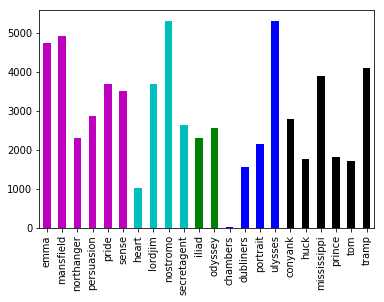

In [141]:
verb_past_df_sum = austen_verb_pastdf["sum"].append([conrad_verb_pastdf["sum"], homer_verb_pastdf["sum"], joyce_verb_pastdf["sum"], twain_verb_pastdf["sum"]]  )
verb_past_df_sum.plot(kind='bar', color='mmmmmmccccggbbbbkkkkkk')

In [1]:
austen_verb_pres_toks = [ Counter([tok for tok in doc if tok.tag_ != ("VBN" or "VBD")]) for doc in austen ]

NameError: name 'austen' is not defined

In [147]:
frames = [austen_verb_pastdf["sum"], conrad_verb_pastdf["sum"], homer_verb_pastdf["sum"], joyce_verb_pastdf["sum"], twain_verb_pastdf["sum"]]

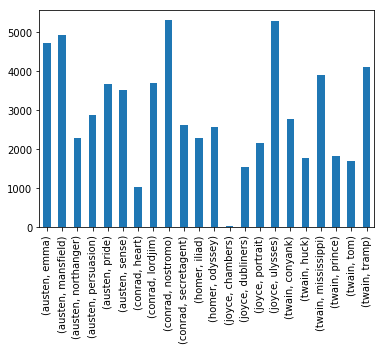

In [159]:
# took too long to load... trying something else.
pst_vrbs_df = pd.concat(frames, keys=['austen', 'conrad', 'homer', 'joyce', 'twain'])
pst_vrbs_df.plot(kind='bar')

In [ ]:
pst_vrbs_df= austen_verb_pastdf.append([conrad_verb_pastdf, homer_verb_pastdf, joyce_verb_pastdf, twain_verb_pastdf])

In [ ]:
'''
from spacy.symbols import POS, NOUN, VERB, DET

TAG_MAP = {
    "NNS":  {POS: NOUN, "Number": "plur"},
    #verb, base form
    "VB":  {POS: VERB, "VerbForm": "inf"},
    #verb, past tense
    "VBD":  {POS: VERB, "VerbForm": "fin", "Tense": "past"},
    #verb, gerund or present participle
    "VBG":  {POS: VERB, "VerbForm": "part", "Tense": "pres", "Aspect": "prog"},
    #verb, past participle
    "VBN":  {POS: VERB, "VerbForm": "part", "Tense": "past", "Aspect": "perf"},
    #verb, non-3rd person singular present
    "VBP":  {POS: VERB, "VerbForm": "fin", "Tense": "pres"},
    #verb, 3rd person singular present
    "VBZ":  {POS: VERB, "VerbForm": "fin", "Tense": "pres", "Number": "sing", "Person": "3"},
    "DT":   {POS: DET}
}
'''

In [ ]:
for token in books[0]:
    if token.pos_ == 'ADV':
        print(token.text, token.tag_)

In [ ]:
passive_toks = [ Counter([tok for tok in doc if tok.dep_ == "nsubjpass"]) for doc in books ]

In [ ]:
passive_series = pd.Series(passive_toks, index=labels)
passive_seriesDict = {label: series for label, series in zip(labels, passive_series)}

passivedf = pd.DataFrame(passive_seriesDict).T.groupby(booksDf.columns, axis=1).agg(np.max).fillna(0)


In [ ]:
passivedf["sum"] = passivedf.sum(axis=1)

In [ ]:
passivedf["sum"].sort_values(ascending=False).plot(kind='bar')

In [ ]:
verb_past_toks = [ Counter([tok for tok in doc if tok.tag_ == "VBN" or "VBD"]) for doc in books ]

In [ ]:
verb_past_toks_series = pd.Series(verb_past_toks, index=labels)
verb_past_toks_seriesDict = {label: series for label, series in zip(labels, verb_past_toks_series)}

In [ ]:
verb_pastdf = pd.DataFrame(verb_past_toks_seriesDict).T

In [ ]:
verb_pastdf["sum"] = verb_pastdf.sum(axis=1)

In [ ]:
verb_pastdf["sum"].sort_values(ascending=False).plot(kind='bar')

In [ ]:
booksDf = pd.DataFrame(seriesDict).T.fillna(0).transpose()
booksDf.head()

In [ ]:
booksSeries = [pd.Series(Counter(   
                    [word.string.strip().lower() 
                     for word in doc]))/len(doc) 
                     for doc in books]

seriesDict = {label: series for label, series in zip(labels, booksSeries)}

booksDf = pd.DataFrame(seriesDict).T.fillna(0)

In [ ]:
booksDf.head()

In [ ]:
booksDf[[tok.dep_ == "nsubjpass"]].plot(kind='bar', title='Term Frquency Distribution', rot=45)